# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

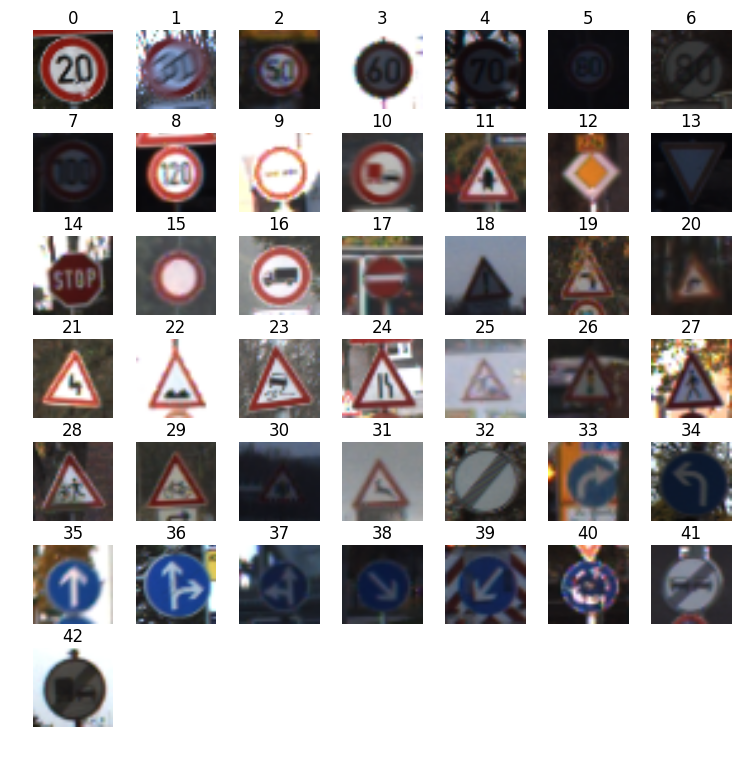

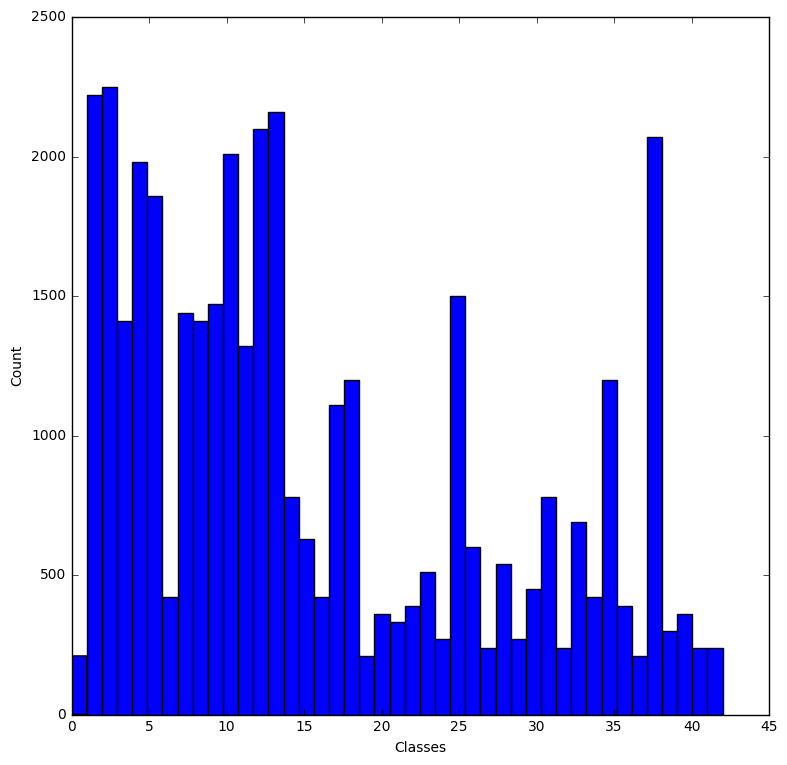

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

plt.rcParams["figure.figsize"] = (9, 9)

# Create an overview of trafic sign classes
fig_rows = fig_cols = int(n_classes ** 0.5) + 1
fig, axes = plt.subplots(fig_rows, fig_cols)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

[ax.axis('off') for ax in axes.flat]

for cl in range(n_classes):
    picked = np.random.randint(n_train)
    while y_train[picked] != cl:
        picked = np.random.randint(n_train)
    axis = axes.flat[cl]
    axis.imshow(X_train[picked])
    axis.set_title(cl)

plt.show()

plt.figure()
plt.hist(y_train, n_classes)

plt.xlabel('Classes')
plt.ylabel('Count')
plt.show()



----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
def preprocess_data(images):
    return (images.astype('float') - 128) /128
X_train_norm = preprocess_data(X_train)
X_test_norm = preprocess_data(X_test)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

To deal with numerical issues of calculatin float numbers it is recommended that all values involved in calculatin of the loss function to be not too big and not too small. In order to help the optimizer to find the solution it is recommended to keep values around mean of zero and unit variance. So I normalized images as suggested in lectures: substructed 128 and divided by 128. Now all data is within [-0.5, 0.5] with about 0 mean



In [5]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

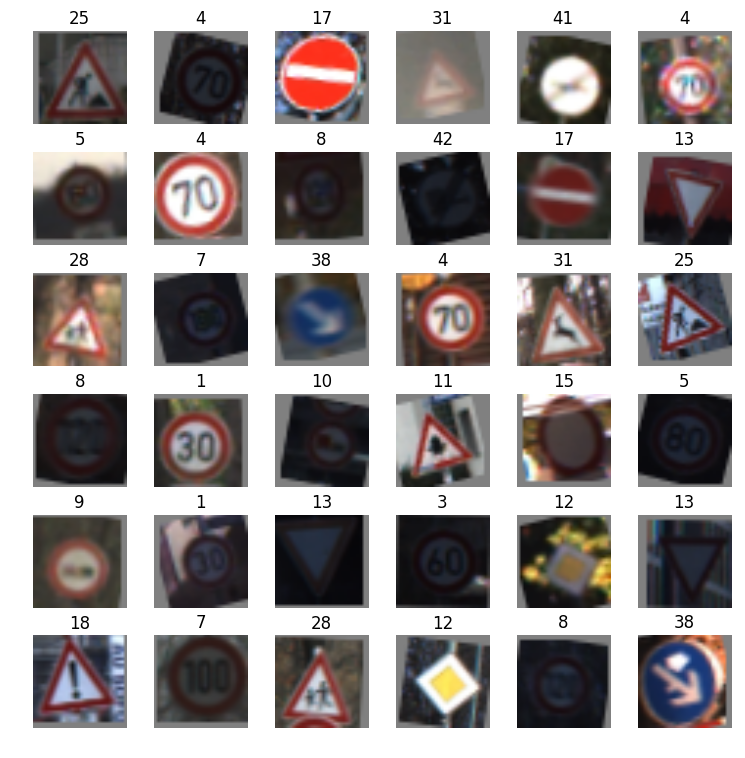

In [6]:
import cv2
new_features_mult = 1
num_add_features = len(X_train_norm) * new_features_mult
new_features = 0
new_features = np.zeros((num_add_features, *X_train_norm[0].shape), dtype=X_train_norm.dtype)
new_labels = np.zeros((num_add_features), dtype=y_train.dtype)
#print(new_labels.shape)
#print(y_train.shape)

rows, cols, _ = X_train[0].shape

def jitter_image(img):
    angle = np.random.randint(-15, 16)
    trans_x = np.random.randint(-2, 3)
    trans_y = np.random.randint(-2, 3)
    scale = np.random.uniform(0.9, 1.1)
    
    Rot_Scale_M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, scale)
    Trans_M = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
  
    img = cv2.warpAffine(img, Rot_Scale_M, (cols, rows))
    img = cv2.warpAffine(img, Trans_M, (cols, rows))
    
    return img

for feature_ind in range(len(X_train_norm)):
    img = X_train_norm[feature_ind]
    for i in range(new_features_mult):
        new_features[feature_ind*new_features_mult + i] = jitter_image(img)
        new_labels[feature_ind*new_features_mult + i] = y_train[feature_ind]
        

fig_rows = fig_cols = 6
fig, axes = plt.subplots(fig_rows, fig_cols)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

[ax.axis('off') for ax in axes.flat]

for i in range(fig_rows * fig_cols):
    picked = np.random.randint(n_train)
    axis = axes.flat[i]
    axis.imshow((new_features[picked] * 128 + 128).astype('uint8'))
    axis.set_title(new_labels[picked])

plt.show()


In [7]:
X_train_norm_ext = np.append(X_train_norm, new_features, axis=0)
y_train_ext = np.append(y_train, new_labels, axis=0)
#free memory
del new_features
del new_labels

In [8]:
from sklearn.model_selection import train_test_split
train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train_norm_ext, 
    y_train_ext, 
    test_size=0.2, 
    random_state=42)
print("Number of training examples =", len(train_labels))
print("Number of validation examples =", len(valid_labels))

Number of training examples = 62734
Number of validation examples = 15684


In [9]:
#free memory
del X_train_norm_ext
del y_train_ext

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I generated additional data as suggested in http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf. I jittered every image by randomly rotatin it [-15, 15] degrees, scaling [0.9, 1.1] and translating [-2, 2] pixels. I generated only one (not five) additional image per every existed due to lack of memory.  

All extended data was splitted: 80% - train data, 20% - validation data. Test data was left unchanged(except normalization, see question 1)

In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
# one_hot does not work on GPU on Windows
with tf.device('/cpu:0'):
    one_hot_y = tf.one_hot(y, 43)

mu = 0
sigma = 0.05

# Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x32.
conv1_w = tf.Variable(tf.truncated_normal([5, 5, 3, 32], mean = mu, stddev = sigma))
conv1_b = tf.Variable(tf.constant(0.01, shape=[32]))
conv1 = tf.nn.conv2d(x, conv1_w, strides=[1, 1, 1, 1], padding='SAME') + conv1_b

# Activation.
conv1 = tf.nn.relu(conv1)

# Pooling. Input = 32x32x32. Output = 16x16x32.
conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

# Layer 2: Convolutional. Output = 16x16x64.
conv2_w = tf.Variable(tf.truncated_normal([5, 5, 32, 64], mean = mu, stddev = sigma))
conv2_b = tf.Variable(tf.constant(0.01, shape=[64]))
conv2 = tf.nn.conv2d(conv1, conv2_w, strides=[1, 1, 1, 1], padding='SAME') + conv2_b

# Activation.
conv2 = tf.nn.relu(conv2)

# Pooling. Input = 16x16x64. Output = 8x8x64.
conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

# Flatten. Input = 8x8x64. Output = 4096.
flat = flatten(conv2)

# Layer 3: Fully Connected. Input = 4096. Output = 512.
fc1_w = tf.Variable(tf.truncated_normal([4096, 512], mean = mu, stddev = sigma))
fc1_b = tf.Variable(tf.constant(0.01, shape=[512]))
fc1 = tf.matmul(flat, fc1_w) + fc1_b

# Activation and dropout.
fc1 = tf.nn.relu(fc1)
fc1 = tf.nn.dropout(fc1, keep_prob)

# Layer 4: Fully Connected. Input = 512. Output = 256.
fc2_w = tf.Variable(tf.truncated_normal([512, 256], mean = mu, stddev = sigma))
fc2_b = tf.Variable(tf.constant(0.01, shape=[256]))
fc2 = tf.matmul(fc1, fc2_w) + fc2_b

# Activation and dropout.
fc2 = tf.nn.relu(fc2)
fc2 = tf.nn.dropout(fc2, keep_prob)

# Layer 5: Fully Connected. Input = 256. Output = 43.
fc3_w = tf.Variable(tf.truncated_normal([256, 43], mean = mu, stddev = sigma))
fc3_b = tf.Variable(tf.constant(0.01, shape=[43]))
fc3 = tf.matmul(fc2, fc3_w) + fc3_b

logits = fc3


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
Conv layer with 5x5 filters and depth 32 -> ReLU -> max-pool 2x2 -> Conv 5x5x64 -> ReLU -> max-pool -> Fully Connected layer with output 512 -> dropout with probability 0.5 during training -> FC 256 -> dropout 0.5 -> FC 43 -> logits. Weights are initialized with normal distribution with 0 mean and 0.05 sigma. Initial biases are set to 0.01.

In [11]:
### Train your model here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

EPOCHS = 30
BATCH_SIZE = 64

rate = 0.001
beta = 0.0005

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
# l2 regularization
regularizers = (tf.nn.l2_loss(conv1_w) + tf.nn.l2_loss(conv1_b) +
                tf.nn.l2_loss(conv2_w) + tf.nn.l2_loss(conv2_b) +
                tf.nn.l2_loss(fc1_w) + tf.nn.l2_loss(fc1_b) +
                tf.nn.l2_loss(fc3_w) + tf.nn.l2_loss(fc2_b) +
                tf.nn.l2_loss(fc2_w) + tf.nn.l2_loss(fc3_b))
loss_operation += beta * regularizers  
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)


correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, operation = accuracy_operation):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


model_path = "./model/model.ckpt"
saver = tf.train.Saver()

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(train_features)
    best_valid_accuracy = 0
    print("Training...")
    print()
    for i in range(EPOCHS):
        train_features, train_labels = shuffle(train_features, train_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = train_features[offset:end], train_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
        
        train_loss = evaluate(train_features, train_labels, loss_operation)
        validation_loss = evaluate(valid_features, valid_labels, loss_operation)
        train_accuracy = evaluate(train_features, train_labels)
        validation_accuracy = evaluate(valid_features, valid_labels)
        if validation_accuracy > best_valid_accuracy:
            best_valid_accuracy = validation_accuracy
            saver.save(sess, model_path)
            
        print("EPOCH {} ...".format(i+1))
        print("Train loss = {:.3f}".format(train_loss))
        print("Train Accuracy = {:.3f}".format(train_accuracy))
        print("Validation loss = {:.3f}".format(validation_loss))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
 

Training...

EPOCH 1 ...
Train loss = 0.558
Train Accuracy = 0.938
Validation loss = 0.584
Validation Accuracy = 0.929

EPOCH 2 ...
Train loss = 0.432
Train Accuracy = 0.971
Validation loss = 0.460
Validation Accuracy = 0.962

EPOCH 3 ...
Train loss = 0.392
Train Accuracy = 0.980
Validation loss = 0.426
Validation Accuracy = 0.967

EPOCH 4 ...
Train loss = 0.375
Train Accuracy = 0.983
Validation loss = 0.407
Validation Accuracy = 0.974

EPOCH 5 ...
Train loss = 0.362
Train Accuracy = 0.988
Validation loss = 0.392
Validation Accuracy = 0.978

EPOCH 6 ...
Train loss = 0.334
Train Accuracy = 0.993
Validation loss = 0.364
Validation Accuracy = 0.983

EPOCH 7 ...
Train loss = 0.346
Train Accuracy = 0.989
Validation loss = 0.379
Validation Accuracy = 0.979

EPOCH 8 ...
Train loss = 0.336
Train Accuracy = 0.993
Validation loss = 0.363
Validation Accuracy = 0.985

EPOCH 9 ...
Train loss = 0.324
Train Accuracy = 0.994
Validation loss = 0.354
Validation Accuracy = 0.985

EPOCH 10 ...
Train loss 

In [13]:
with tf.Session() as sess:
    saver.restore(sess, model_path)
    test_accuracy = evaluate(X_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.973


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**
I used adam optimizer as recommended in CS231n with learning rate 0.001 (actually it is default rate for tf.train.AdamOptimizer).  
Batch size: 64
Epochs: maximum number of epochs was set to 30, but I saved model after epoch with the highest Validation Accuracy and used it for the test data
Also I used l2 legularization with coef. beta = 0.0005
dropout prob.  - 0.5

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I started from the LeNet achitecture and changed input depth of the first layer and output depth of the last. Then I generated additional jittered data - more data is always better (if you do not pay attention to speed). Then I added depth to inner layers because this data has much more information that data for LeNet (MNIST). Then changed initialization of biasis to 0.01 (it was suggested in CS231n to reduce gradient killing when ReLU activation is used) . Then added dropout after FC layers and l2 regularization (to prevent overfitting). Each of these steps slightly improved validation accuracy. I tried to change weights initialization to "Xavier initialization" as recommended in CS231n lecture 5, but validation accuracy decreased so I returned to simple initialization with constant sigma.  
 As in LeNet here I used softmax as activation function because it is used to predict one class from many mutually exclusive classes

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

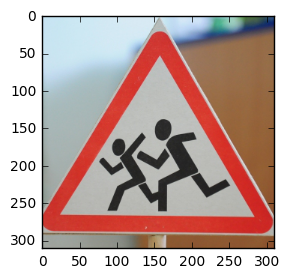

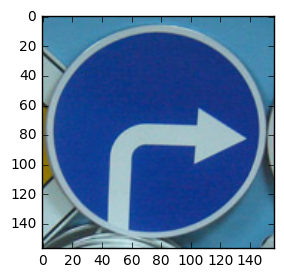

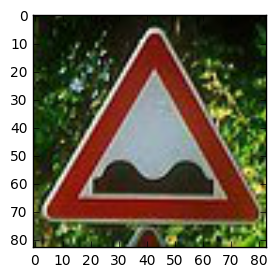

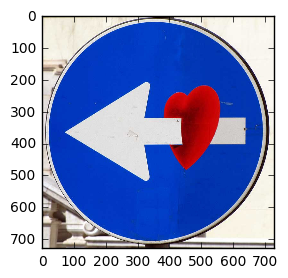

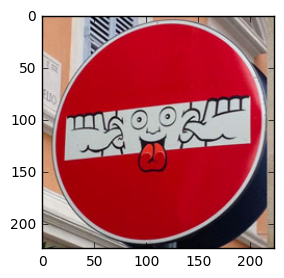

In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import matplotlib.image as mpimg
plt.rcParams["figure.figsize"] = (3, 3)
images_dir = "./new_signs/"
files = os.listdir(images_dir)
images = [(mpimg.imread(images_dir + file) * 255).astype(np.uint8) for file in files]
for image in images:
    plt.figure()
    plt.imshow(image)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
All types of signs in the downloaded images are contained in the dataset. First three are pretty clear and should be easily classified.  
Fourth (keep left) has red heart which can distruct the classifier. Also all such arrows in the dataset are turned a little bit down and this looks straing left.  
Fifth image has some additional drawing on it which can hamper classification

In [15]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
import cv2
resized_images = [cv2.resize(image,(32,32)) for image in images]
images_norm = preprocess_data(np.array(resized_images))

predict_operation = tf.nn.softmax(logits)

with tf.Session() as sess:
    saver.restore(sess, model_path)

    softmax_probs = sess.run(predict_operation, feed_dict={x: images_norm,  keep_prob: 1.0})
    print(np.argmax(softmax_probs, axis = 1))

[28 33 22 39 17]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

28 - Children crossing  
33 - Turn right ahead  
22 - Bumpy road  
39 - Keep left  
17 - No entry  

All predictions are correct  
It is a very strange task to compare accuracy of a set of only five images but... It is obvious that the accuracy of the images from the Internet is 100% which is close to 97.3% test accuracy on the dataset

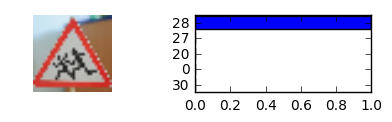

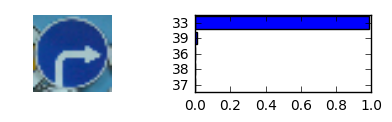

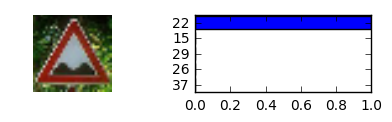

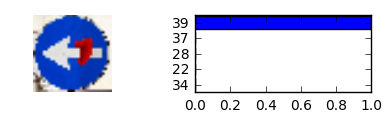

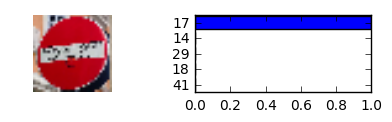

In [16]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
   top5 = sess.run(tf.nn.top_k(tf.constant(softmax_probs), k=5))


pos = np.arange(5)+.5 
for i in range(len(images_norm)):
    plt.figure(figsize = (5, 1))
    plt.subplot(121)
    plt.axis('off');
    plt.imshow((images_norm[i] * 128 + 128).astype('uint8'))
    plt.subplot(122)
    plt.barh(pos, top5[0][i][::-1], align='center')
    plt.yticks(pos, (top5[1][i][::-1]))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

All predictions are certain

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.